In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Funciones Globales y de errores

In [ ]:
def propagar_suma(x, y, delta_x, delta_y):
  z = x + y
  delta_z = np.sqrt((delta_x) ** 2 + (delta_y) ** 2)

  return [z, delta_z]

def propagar_resta(x, y, delta_x, delta_y):
  z = x - y
  delta_z = np.sqrt((delta_x) ** 2 + (delta_y) ** 2)

  return [z, delta_z]


def propagar_mult(x, y, delta_x, delta_y):
  z = x * y
  delta_z = (x * y) * np.sqrt((delta_x / x) ** 2 + (delta_y / y) ** 2)

  return [z, delta_z]


def propagar_div(x, y, delta_x, delta_y):
  z = x / y
  delta_z = (x / y) * np.sqrt((delta_x / x) ** 2 + (delta_y / y) ** 2)

  return [z, delta_z]


#En radianes
def propagar_cos(x, delta_x):
  z = np.cos(x)
  delta_z = delta_x * np.sin(x)

  return [z, delta_z]


#m es el exponente
def propagar_pot(x, delta_x, m):
  z = x ** m
  delta_z = x ** m * (m * delta_x / x)

  return [z, delta_z]

In [ ]:
def error_abs(error_apreciacion, error_exactitud, error_estadistico, error_definicion):
  error_nom = np.sqrt((error_apreciacion) ** 2 + (error_exactitud) ** 2 + (error_definicion) ** 2)
  error_abs = np.sqrt((error_nom) ** 2 + (error_estadistico) ** 2)

  return error_abs


#Aprepeciacion --> De ver maso la medicion
#Exactitud --> De la calibracion del instrumento
#Definicion --> De la forma del objeto a medir


def error_rel(x, delta_x):
  return delta_x/x


def analisis_error(x, error_apreciacion, error_exactitud, error_estadistico, error_definicion):
  err_abs = error_abs(error_apreciacion, error_exactitud, error_estadistico, error_definicion)
  err_rel = error_rel(x, err_abs)
  err_rel_por = err_rel * 100

  print([x, err_abs])
  print(f'El error absoluto es: {err_abs}')
  print(f'El error relativo es: {err_rel}')
  print(f'El error relativo porcentual es: {err_rel_por}')


def dif_sig(x, y, delta_x, delta_y):
  if np.abs(x - y) <= delta_x + delta_y:
    return 'No hay'
  else:
    return 'Si hay'


#Carga de Datos

In [ ]:
nombre_archivo = 'Latex_20_confinamiento_16mW_0.txt'

In [ ]:
data = pd.read_csv(nombre_archivo, delimiter = ';', skiprows = 2)

##Funciones Utiles

In [ ]:
def corregir_valores(data):
  #Los valores obtenidos del tracker tienen notacion cientifica con E pero python la interpreta con e. La funcion cambia E por e
  for column in data.columns:
    data[column] = data[column].astype(str).str.replace(',', '.', regex=False)
    data[column] = pd.to_numeric(data[column], errors='coerce')

##Limpieza y Transfomacion

<p align="justify"> Debido a que los datos del Tracker estan dados en notacion cientifica pero utilizando E, fue necesario aplicar una funcion para transformarlas en e ya que es la manera en que python interpreta esta notacion. Por otra parte, las columnas estan numerados de manera que la primer particula no posee indice numerico pero las $N - 1$ restantes si, del estilo $variable.i$. Por lo tanto, se utilizo el numero $0$ para enumerar a las variables sin numeracion. Por ultimo, para la realizacion del grafico de trayectorias fue necesario normalizarlas de manera que todas comiencen en cero. Las mismas se encuentran en las columnas _norm. Se define la variable global numero de moleculas como n_moleculas.

In [ ]:
cols = data.columns.tolist()

nuevas_cols = [col + '.0' if '.' not in col else col for col in cols]

cols_con_t = ['t'] + nuevas_cols[1:]

data.columns = cols_con_t




---



IMPORTANTE: Numero de moleculas

In [ ]:
j = ''

for i in range(1, len(cols[-2])):
  j += cols[-2][-i]
  if cols[-2][-i] == '.':
    break

n_moleculas = 0

if len(j) > 2:
  n_moleculas = int(j[1::-1]) + 1
else:
  n_moleculas = int(j[0]) + 1

n_moleculas

4



---



In [ ]:
data.columns

Index(['t', 'x.0', 'y.0', 'x.1', 'y.1', 'x.2', 'y.2', 'x.3', 'y.3',
       'Unnamed: 9.0'],
      dtype='object')

In [ ]:
corregir_valores(data)

data.tail()

,t,x.0,y.0,x.1,y.1,x.2,y.2,x.3,y.3,Unnamed: 9.0
396,26.39824,0.000028,-0.000045,0.000027,-0.000045,0.000028,-0.000044,0.000028,-0.000045,NaN
397,26.46490,0.000028,-0.000045,0.000027,-0.000044,0.000028,-0.000044,0.000028,-0.000045,NaN
398,26.53156,0.000028,-0.000045,0.000027,-0.000044,0.000028,-0.000044,0.000028,-0.000045,NaN
399,26.59823,0.000028,-0.000045,0.000027,-0.000045,0.000029,-0.000044,0.000028,-0.000045,NaN
400,26.66489,0.000028,-0.000045,0.000027,-0.000045,0.000029,-0.000044,0.000028,-0.000045,NaN


In [ ]:
data.ffill(inplace=True)
data.bfill(inplace=True)
data.fillna(0)

,t,x.0,y.0,x.1,y.1,x.2,y.2,x.3,y.3,Unnamed: 9.0
0,0.000000,0.000028,-0.000045,0.000027,-0.000045,0.000028,-0.000044,0.000028,-0.000045,0.0
1,0.066662,0.000028,-0.000045,0.000027,-0.000045,0.000028,-0.000044,0.000028,-0.000045,0.0
2,0.133324,0.000028,-0.000045,0.000027,-0.000044,0.000028,-0.000044,0.000028,-0.000045,0.0
3,0.199987,0.000028,-0.000045,0.000027,-0.000045,0.000029,-0.000044,0.000028,-0.000045,0.0
4,0.266649,0.000028,-0.000045,0.000027,-0.000045,0.000028,-0.000044,0.000028,-0.000045,0.0
...,...,...,...,...,...,...,...,...,...,...
396,26.398240,0.000028,-0.000045,0.000027,-0.000045,0.000028,-0.000044,0.000028,-0.000045,0.0
397,26.464900,0.000028,-0.000045,0.000027,-0.000044,0.000028,-0.000044,0.000028,-0.000045,0.0
398,26.531560,0.000028,-0.000045,0.000027,-0.000044,0.000028,-0.000044,0.000028,-0.000045,0.0
399,26.598230,0.000028,-0.000045,0.000027,-0.000045,0.000029,-0.000044,0.000028,-0.000045,0.0


##Conversion de unidad

Los dataframes estan en $\mu m$

In [ ]:
multiplicador = 1e6

columnas_a_multiplicar = data.columns[1:]

data[columnas_a_multiplicar] = data[columnas_a_multiplicar] * multiplicador

In [ ]:
for i in range(0, n_moleculas):


  data[f'x.{i}_norm'] = (data[f'x.{i}'].values - data[f'x.{i}'][0])
  data[f'y.{i}_norm'] = (data[f'y.{i}'].values - data[f'y.{i}'][0])

In [ ]:
data.isna()

,t,x.0,y.0,x.1,y.1,x.2,y.2,x.3,y.3,Unnamed: 9.0,x.0_norm,y.0_norm,x.1_norm,y.1_norm,x.2_norm,y.2_norm,x.3_norm,y.3_norm
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
399,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
data.shape

(401, 18)

In [ ]:
len(data)

401

#Analisis


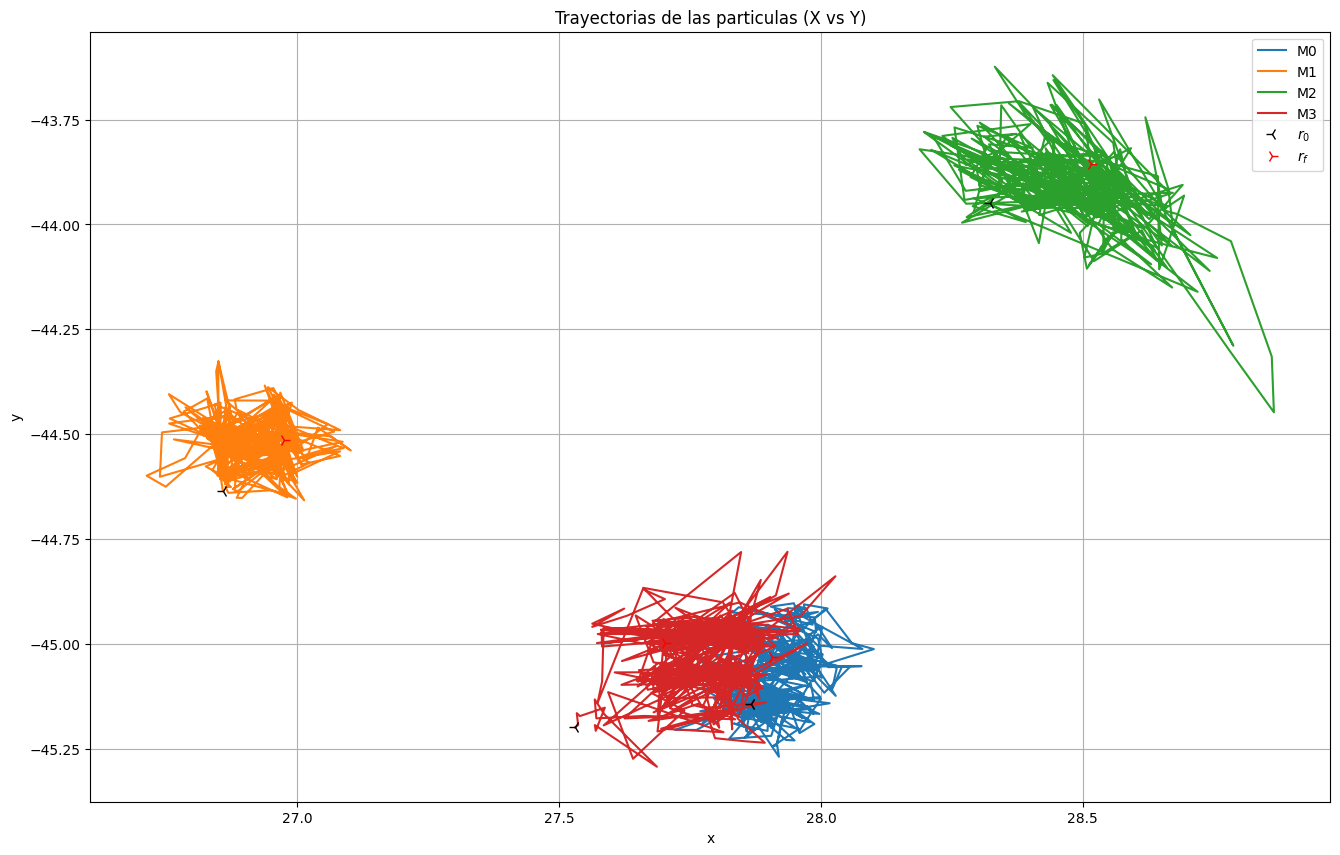

In [ ]:
#Visualizamos las trayectorias en un grafico espacial bidimensional
plt.figure(figsize=(16, 10))

for i in range(0, n_moleculas):

  plt.plot(data[f'x.{i}'], data[f'y.{i}'], label=f'M{i}')
  plt.plot(data[f'x.{i}'][0], data[f'y.{i}'][0], 'k3', markersize = 9)
  plt.plot(data[f'x.{i}'].tail(1), data[f'y.{i}'].tail(1), 'r4', markersize = 9)


plt.plot(data[f'x.0'][0], data[f'y.0'][0], 'k3', markersize = 9, label = '$r_0$')
plt.plot(data[f'x.0'].tail(1), data[f'y.0'].tail(1), 'r4', markersize = 9, label = '$r_f$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trayectorias de las particulas (X vs Y)')
plt.legend()
plt.grid(True)
plt.show()

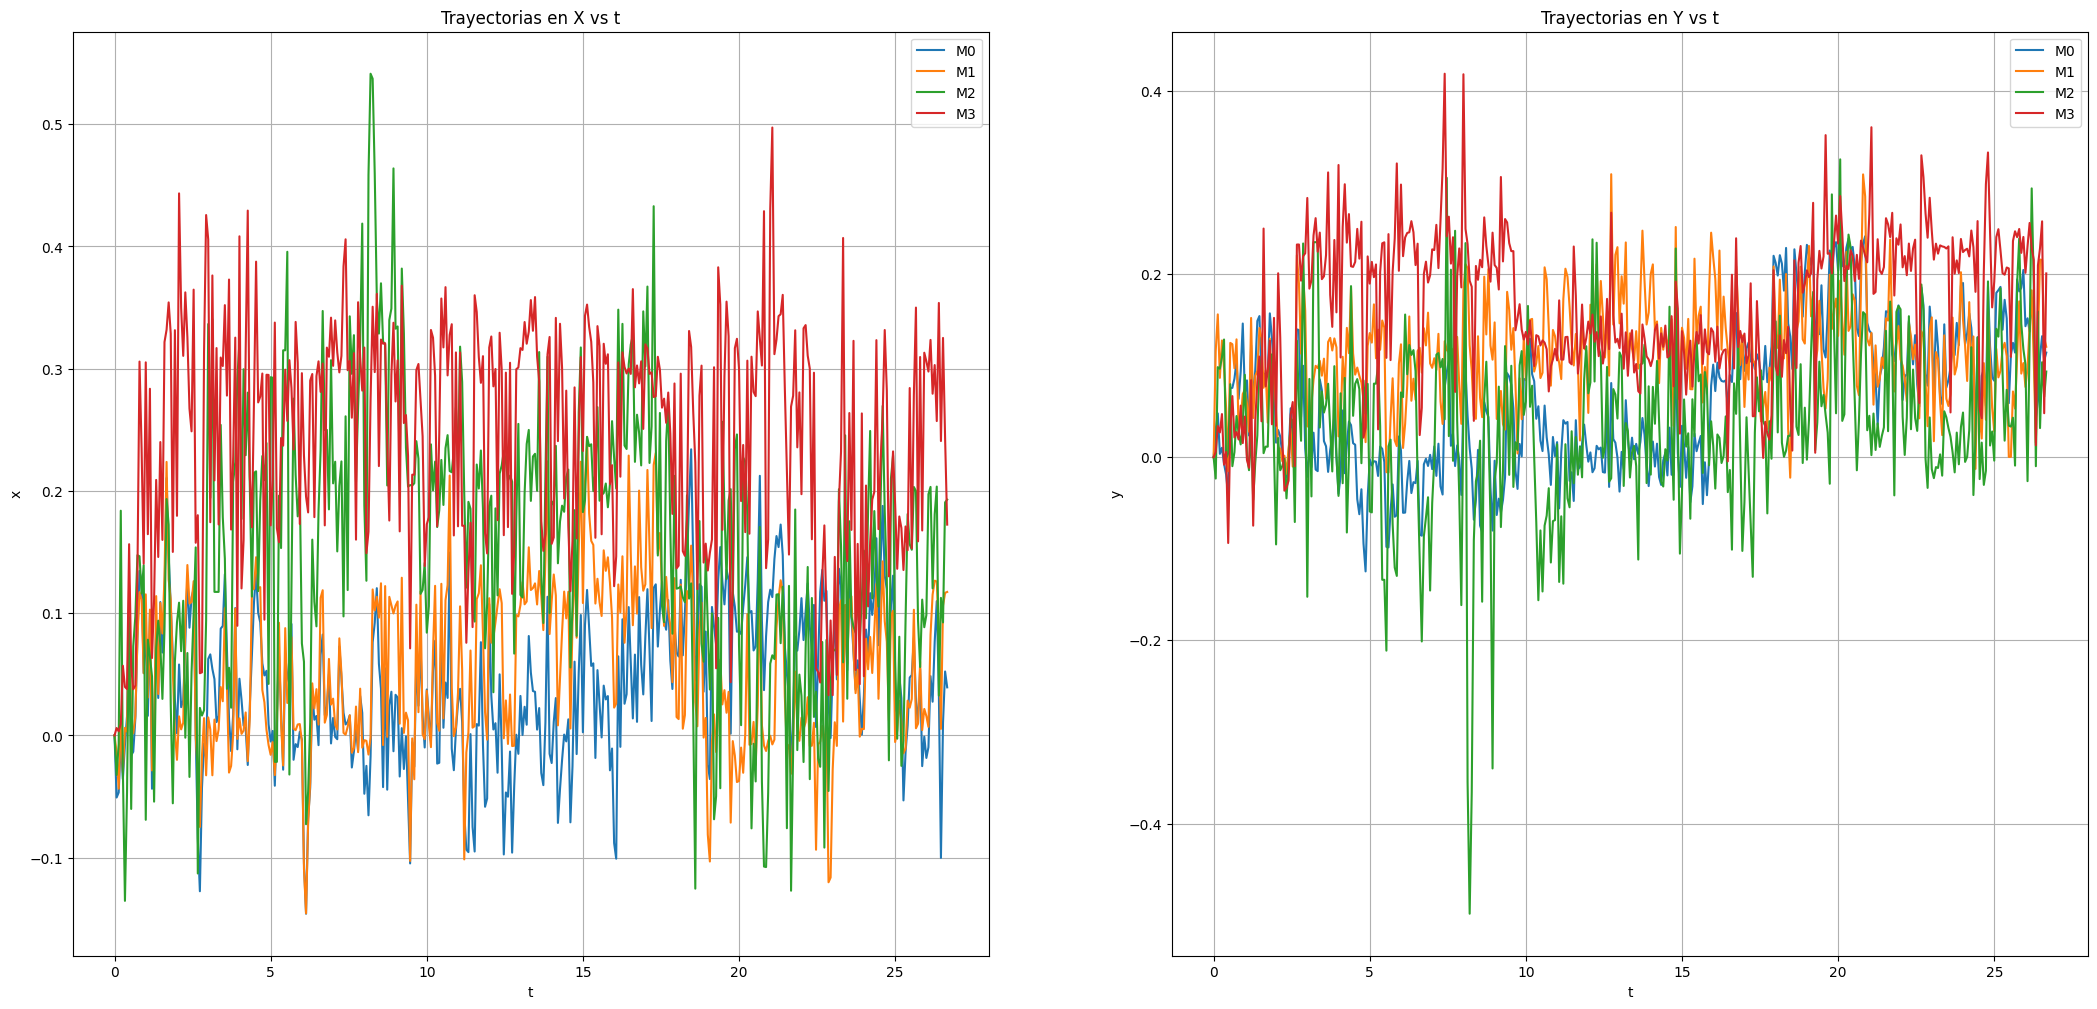

In [ ]:
#Graficamos la evolucion temporal de cada particula con mismo origen para observar la desviacion de cada una

fig, ax = plt.subplots(1, 2, figsize=(26, 12))

for i in range(0, n_moleculas):
  ax[0].plot(data['t'], data[f'x.{i}_norm'], label=f'M{i}')
  ax[1].plot(data['t'], data[f'y.{i}_norm'], label=f'M{i}')

ax[0].set_xlabel('t')
ax[0].set_ylabel('x')
ax[0].set_title('Trayectorias en X vs t')
ax[0].legend()
ax[0].grid(True)
ax[1].set_ylabel('y')
ax[1].set_xlabel('t')
ax[1].set_title('Trayectorias en Y vs t')
ax[1].legend()
ax[1].grid(True)


plt.show()

#Radio de Confinamiento

**Extra**: Si el dataset no tiene la columna "r" de posicion ejecutar la siguiente celda

In [ ]:
for i in range(0, n_moleculas):
  data[f'r.{i}'] = np.sqrt(data[f'x.{i}']**2 + data[f'y.{i}']**2)

Esto es usando $R_C = max_X |X - X_0| - \langle X - X_0 \rangle$

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3394653064.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.axhline(y=r_conf_medio_sin_laser, color='red', linestyle='--', label= f'Radio promedio sin laser ({np.round(r_conf_medio_sin_laser, 2)} $\mu m$)')


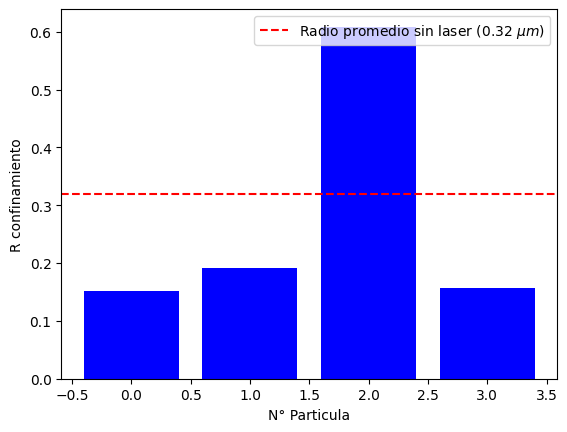

In [ ]:
R_confs = []


def calc_r_confs(data):
  for i in range(0, n_moleculas):
    X0 = data[f'r.{i}'].iloc[0]
    diff = np.abs(data[f'r.{i}'] - X0)
    R_conf = diff.max() - diff.mean()
    R_confs.append(R_conf)

calc_r_confs(data)

r_conf_medio_sin_laser = np.mean(R_confs[1:])



plt.bar(range(0, n_moleculas), R_confs, color='blue')
plt.axhline(y=r_conf_medio_sin_laser, color='red', linestyle='--', label= f'Radio promedio sin laser ({np.round(r_conf_medio_sin_laser, 2)} $\mu m$)')
plt.xlabel('N° Particula')
plt.ylabel('R confinamiento')
plt.legend()
plt.show()

In [ ]:
print(f'Radio de la particula confinada: {np.median(R_confs)} ± {np.std(R_confs)}')

Radio de la particula confinada: 0.17421677325454518 ± 0.19188534121650752


#MSD

In [ ]:
#Definimos la funcion MSD para calcular el desplazamiento medio cuadratico. En este caso lag_time es una medida de n

def MSD(x, y, max_lag_time):

  N = len(x)
  msd = np.zeros(max_lag_time)

  for dt in range(1, max_lag_time + 1):
    squared_displacements = []
    for i in range(N - dt):
      dx = x[i + dt] - x[i]
      dy = y[i + dt] - y[i]
      squared_displacements.append(dx**2 + dy**2)
    msd[dt - 1] = np.mean(squared_displacements)

  return pd.Series(msd)


In [ ]:
factores_tiempo = np.arange(3, 20)

lags = [len(data)/i for i in factores_tiempo]



def calcular_msd(data, factores):
  lags = [len(data)/i for i in factores]

  for factor in factores:
    max_lag_time = int(len(data)/factor)
    lag_times = data['t'][:max_lag_time]

    data[f'msd_promedio_{factor}'] = np.zeros(len(data))

    for i in range(0, n_moleculas):
      data[f'msd.{i}_{factor}'] = MSD(data[f'x.{i}_norm'].values, data[f'y.{i}_norm'].values, max_lag_time)
      data.loc[:max_lag_time, f'msd_promedio_{factor}'] += data[f'msd.{i}_{factor}'].loc[:max_lag_time]

    data[f'msd_promedio_{factor}'] = data[f'msd_promedio_{factor}']/n_moleculas


calcular_msd(data, factores_tiempo)

/tmp/ipython-input-3810807139.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'msd.{i}_{factor}'] = MSD(data[f'x.{i}_norm'].values, data[f'y.{i}_norm'].values, max_lag_time)
/tmp/ipython-input-3810807139.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'msd.{i}_{factor}'] = MSD(data[f'x.{i}_norm'].values, data[f'y.{i}_norm'].values, max_lag_time)
/tmp/ipython-input-3810807139.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

In [ ]:
data.head()

,t,x.0,y.0,x.1,y.1,x.2,y.2,x.3,y.3,Unnamed: 9.0,...,msd_promedio_18,msd.0_18,msd.1_18,msd.2_18,msd.3_18,msd_promedio_19,msd.0_19,msd.1_19,msd.2_19,msd.3_19
0,0.000000,27.86692,-45.14432,26.85801,-44.63535,28.32351,-43.94933,27.53030,-45.19900,NaN,...,0.012610,0.005144,0.007537,0.020937,0.016824,0.012610,0.005144,0.007537,0.020937,0.016824
1,0.066662,27.81611,-45.11415,26.84371,-44.51945,28.29117,-43.97262,27.53635,-45.19329,NaN,...,0.015732,0.007444,0.009797,0.027631,0.018056,0.015732,0.007444,0.009797,0.027631,0.018056
2,0.133324,27.82024,-45.09646,26.81441,-44.47938,28.31645,-43.85098,27.53370,-45.16497,NaN,...,0.016966,0.008163,0.010520,0.029334,0.019846,0.016966,0.008163,0.010520,0.029334,0.019846
3,0.199987,27.86265,-45.14066,26.87039,-44.54869,28.50730,-43.85269,27.53970,-45.17199,NaN,...,0.017336,0.009250,0.011722,0.028423,0.019949,0.017336,0.009250,0.011722,0.028423,0.019949
4,0.266649,27.83120,-45.13400,26.82770,-44.50785,28.29532,-43.84008,27.58728,-45.15188,NaN,...,0.018032,0.009758,0.012349,0.029596,0.020423,0.018032,0.009758,0.012349,0.029596,0.020423


In [ ]:
from scipy.optimize import curve_fit

def msd_libre(t, A, B, C):
  return A * (1 - B* np.e**(- C*t))


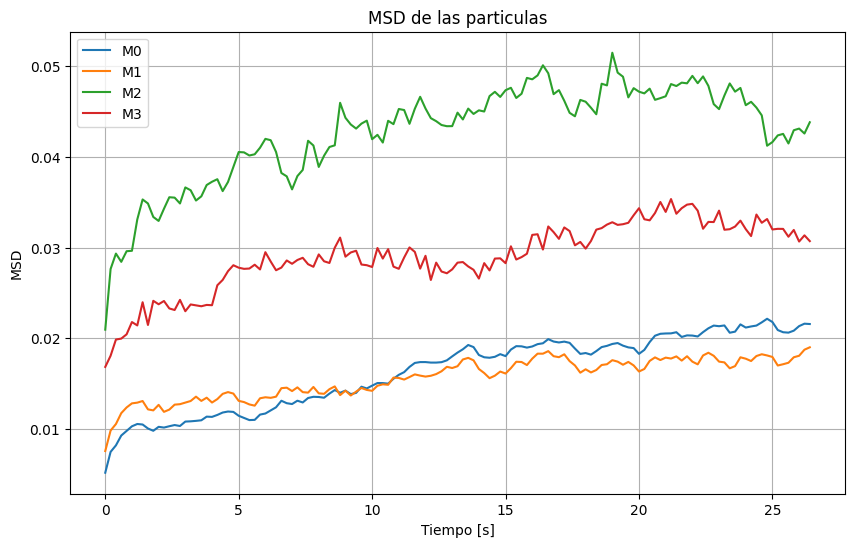

In [ ]:
n_del_msd = 3

plt.figure(figsize=(10, 6))

max_lag_time = int(len(data)/n_del_msd)
lag_times = data['t'][:max_lag_time]

for i in range(0, n_moleculas):
  plt.plot(data['t'][:max_lag_time] * n_del_msd, data[f'msd.{i}_{n_del_msd}'][:max_lag_time], label = f'M{i}')


plt.xlabel('Tiempo [s]')
plt.ylabel('MSD')
plt.title('MSD de las particulas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
ajustes_msd = pd.DataFrame()

for factor in factores_tiempo:
  max_lag_time = int(len(data)/factor)
  lag_times = data['t'][:max_lag_time]

  #

  popt_msd, pcov_msd = curve_fit(msd_libre, lag_times * factor, data[f'msd_promedio_{factor}'][:max_lag_time], p0=[np.mean(R_confs) ** 2, np.mean(R_confs) ** 2, (4/(np.mean(R_confs) ** 2))])
  A = popt_msd[0]
  A_error = np.sqrt(pcov_msd[0, 0])
  B = popt_msd[1]
  B_error = np.sqrt(pcov_msd[1, 1])
  C = popt_msd[2]
  C_error = np.sqrt(pcov_msd[2, 2])

  ajustes_msd.loc[factor, 'A'] = A
  ajustes_msd.loc[factor, 'A_error'] = A_error
  ajustes_msd.loc[factor, 'Factor_tiempo'] = factor
  ajustes_msd.loc[factor, 'B'] = B
  ajustes_msd.loc[factor, 'B_error'] = B_error
  ajustes_msd.loc[factor, 'C'] = C
  ajustes_msd.loc[factor, 'C_error'] = C_error

print(np.sqrt(ajustes_msd['A'].mean())
,np.sqrt(ajustes_msd['A_error'].mean()))


0.15946366555287492 inf


/tmp/ipython-input-1798254984.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_msd, pcov_msd = curve_fit(msd_libre, lag_times * factor, data[f'msd_promedio_{factor}'][:max_lag_time], p0=[np.mean(R_confs) ** 2, np.mean(R_confs) ** 2, (4/(np.mean(R_confs) ** 2))])
/tmp/ipython-input-1798254984.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_msd, pcov_msd = curve_fit(msd_libre, lag_times * factor, data[f'msd_promedio_{factor}'][:max_lag_time], p0=[np.mean(R_confs) ** 2, np.mean(R_confs) ** 2, (4/(np.mean(R_confs) ** 2))])
/tmp/ipython-input-1798254984.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_msd, pcov_msd = curve_fit(msd_libre, lag_times * factor, data[f'msd_promedio_{factor}'][:max_lag_time], p0=[np.mean(R_confs) ** 2, np.mean(R_confs) ** 2, (4/(np.mean(R_confs) ** 2))])
/tmp/ipython-input-1798254984.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_

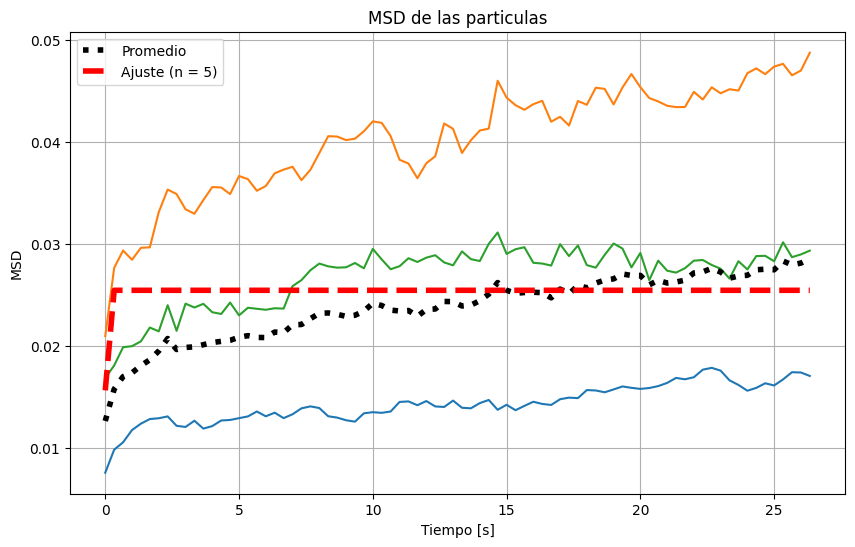

In [ ]:
n_del_msd = 5

plt.figure(figsize=(10, 6))

max_lag_time = int(len(data)/n_del_msd)
lag_times = data['t'][:max_lag_time]

for i in range(1, n_moleculas):
  plt.plot(lag_times * n_del_msd, data[f'msd.{i}_{n_del_msd}'][:max_lag_time])


plt.title('MSD de las particulas')
plt.plot(lag_times* n_del_msd, data[f'msd_promedio_{n_del_msd}'][:max_lag_time], ':k',label='Promedio', linewidth = 4)
plt.plot(lag_times* n_del_msd, msd_libre(lag_times* n_del_msd, np.mean(ajustes_msd['A']), np.mean(ajustes_msd['B']), np.mean(ajustes_msd['C'])), 'r--', label=f'Ajuste (n = {n_del_msd})', linewidth = 4)

plt.xlabel('Tiempo [s]')
plt.ylabel('MSD')
plt.title('MSD de las particulas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
ajustes_msd

,A,A_error,Factor_tiempo,B,B_error,C,C_error
3,0.030302,0.000263,3.0,0.453810,0.008044,0.113150,6.953007e-03
4,0.031002,0.000584,4.0,0.458253,0.009024,0.074914,7.196776e-03
5,0.076949,0.006140,5.0,0.076949,0.708502,51.982760,1.015283e+09
6,0.023135,0.000345,6.0,0.454929,0.119639,49.361607,6.108945e+08
7,0.022594,inf,7.0,0.441875,inf,51.982760,inf
8,0.022159,inf,8.0,0.430925,inf,51.982760,inf
9,0.021707,inf,9.0,0.419072,inf,51.982760,inf
10,0.021438,inf,10.0,0.411779,inf,51.982760,inf
11,0.021151,inf,11.0,0.403802,inf,51.982760,inf
12,0.020955,inf,12.0,0.398229,inf,51.982760,inf


In [ ]:
radio_confinamiento = np.sqrt(ajustes_msd['A'].mean())
radio_confinamiento_error = np.std(np.array(R_confs))

print(f'Radio de la particula confinada: {radio_confinamiento} ± {radio_confinamiento_error}')

Radio de la particula confinada: 0.15946366555287492 ± 0.19188534121650752


#Exportar datos

In [ ]:
datos_exportar_dic = {
    'Variable': ['Radio de Condinamiento - Ajuste(R)', 'Radio de Condinamiento - Formula(R)'],
    'Valor': [radio_confinamiento, np.mean(R_confs)],
    'Error': [radio_confinamiento_error, np.std(R_confs)],
    'Unidad': ['µm', 'µm']
}

datos_exportar = pd.DataFrame(datos_exportar_dic)
datos_exportar.to_csv(f'datos_confinamiento_{nombre_archivo}', index=False)